In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [13]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

In [14]:
print(X, y)

     weight
0    3504.0
1    3693.0
2    3436.0
3    3433.0
4    3449.0
..      ...
393  2790.0
394  2130.0
395  2295.0
396  2625.0
397  2720.0

[392 rows x 1 columns] 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64


In [15]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')
print("종속 데이터: ", y_train.shape )

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


종속 데이터:  (274,)


In [16]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)




In [17]:
# train data를 가지고 모형 학습
pr = LinearRegression()   # 모형 생성
pr.fit(X_train_poly, y_train) # 모형 학습

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)   #   예측한 값과 
print(r_square)
print('\n')

0.7087009262975685




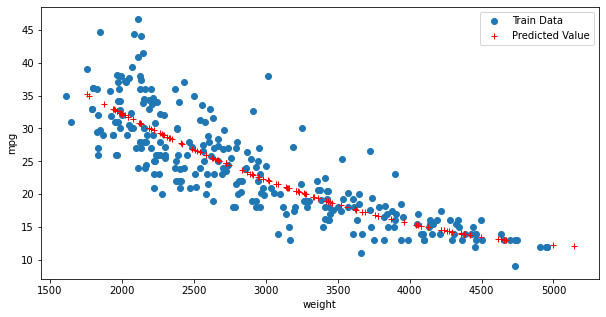

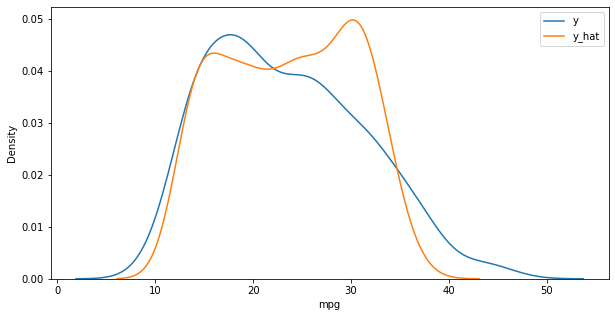

In [18]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [19]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [23]:
x = dataset['data']
y = dataset['target']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

ValueError: Found input variables with inconsistent numbers of samples: [392, 150]

In [ ]:
# 데이터 분석이란?
# -자료를 가져옴
# -누락데이터 처리 및 데이터 전처리 
#         : 데이터 프레임 조인, 분리, 결합...
#         : 데이터 가공
#         : 문자를 더미 원핫인코딩...
#         : 분류화 하거나...
#         : Nan 데이터 처리 
#         : X와 y값 분리
# -실험 데이터와 테스트 데이터로 분리
# -모델학슴
# -모델결과 타겟값 계산 결과
# -테스트 데이터를 모델값에 적용 한 결과 와 실제 테스트의 타겟값과 비교
# -- 점수를 확인
# - 예측된 값과 실제 값을 비교해서 그래프화 함
# - 모델 검증...